#### Analyzing Loan Features On Loan Amount
**By ThankGod Agada**

####  Investigation Overview
The focus of this presentation is on Loan Original Amount. I would explore the features associated with Loan Original Amount, its relationship with other variables, and how their correlation is affected by another variable.

#### Dataset Overview
The dataset consists of 113,937 loan records with 81 variables. A subset of the dataset that focuses on my features of interest was created. The subset includes features like LoanOriginalAmount, StatedMonthlyIncome, IncomeRange amongst others. The subset consists of 16 columns and 113,937 records.

In [1]:
#To Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#Import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#To Load the dataset into pandas dataframe using pd.read_csv() function
loan_df = pd.read_csv('ProsperLoanData.csv')

In [3]:
#To confirm operation
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#To subset the dataframe by selecting variables of interest
colns = ['MemberKey', 'Term', 'BorrowerRate', 'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 
         'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
         'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment']
loan_subset = loan_df[colns]

In [5]:
#Converting IncomeRange into ordered categorical types
ordinal_var_dict = {'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_subset[var] = loan_subset[var].astype(ordered_var)

In [6]:
#Creating a custom Python function for label to avoid repetitive coding. 
def label(x, y, z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

#### Stated Monthly Income Distribution
The distribution clearly shows that the majority of the borrowers earn between 2500k - 7500k. When compared to the other range of monthly income, it can be deduced that they are low-income earners. The distribution or plot is right skewed.

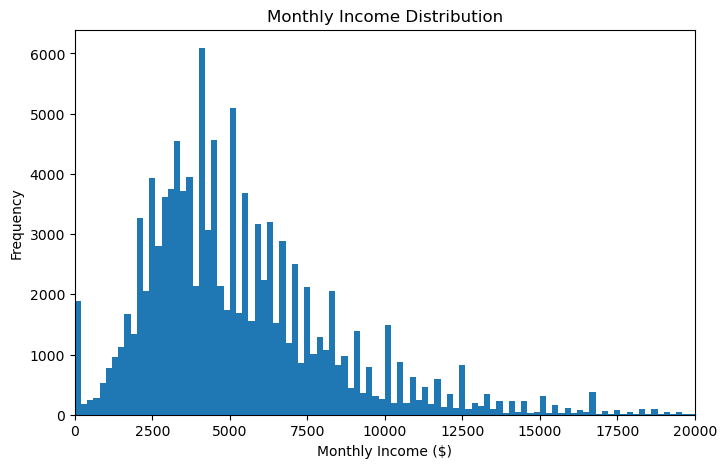

In [7]:
#Creating a Histogram to show the distribution of the Stated Monthly Income
plt.figure(figsize = [8, 5])
#Histogram with dynamic number of bins
bin = np.arange(0,  loan_subset['StatedMonthlyIncome'].max()+200, 200)
plt.hist(data =  loan_subset, x = 'StatedMonthlyIncome', bins = bin)
plt.xlim(0, 20000);
label('Monthly Income ($)', 'Frequency', 'Monthly Income Distribution');

#### Loan Original Amount Distribution
The majority of borrowers took loans of 5k, and the loan amount is spread across 5k to 35k. However, the peak values are 5k, 10k, 15k, 20k, and 25k.

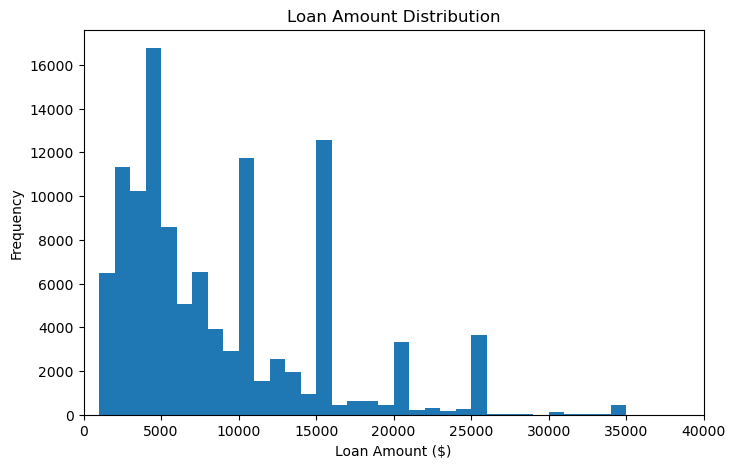

In [8]:
#Creating a Histogram to show the distribution of the 'LoanOriginalAmount'
plt.figure(figsize = [8, 5])
#Histogram with dynamic number of bins
bin = np.arange(0,  loan_subset['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =  loan_subset, x = 'LoanOriginalAmount', bins = bin)
plt.xlim(0, 40000);
label('Loan Amount ($)', 'Frequency', 'Loan Amount Distribution');

#### Monthly Loan Payment Distribution
The distribution is unimodal and right skewed. The majority of the borrowers pay at least 200 dollars monthly, and the highest loan payment is 1200k while a majority of the payment ranges between 200 - 400 dollars monthly.

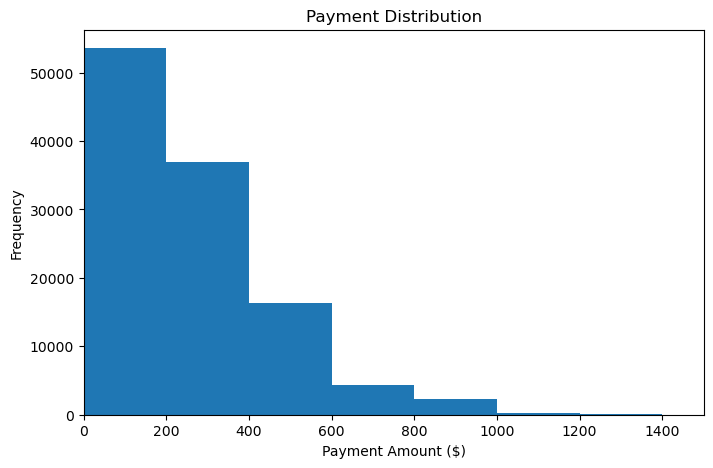

In [9]:
#Creating a Histogram to show the distribution of Monthly Loan Payment
plt.figure(figsize = [8, 5])
#Histogram with dynamic number of bins
bin = np.arange(0, loan_subset['MonthlyLoanPayment'].max()+200, 200)
plt.hist(data =  loan_subset, x = 'MonthlyLoanPayment', bins = bin)
plt.xlim(0, 1500);
label('Payment Amount ($)', 'Frequency', 'Payment Distribution');

#### Correlation Between Loan  Original Amount & IncomeRange
The borrower with the highest IncomeRange of 100k+ got to access a higher amount of loan. The higher your IncomeRange the higher the loan amount accessed.

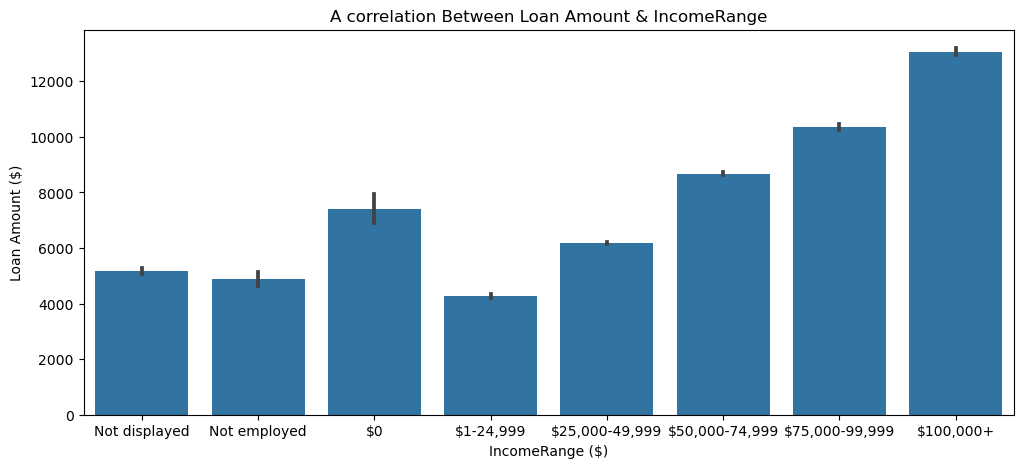

In [10]:
# A barplot showing the correlation between Loan Amount and IncomeRange
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
sb.barplot(data = loan_subset, x ='IncomeRange', y = 'LoanOriginalAmount', color = base_color)
label('IncomeRange ($)', 'Loan Amount ($)', 'A correlation Between Loan Amount & IncomeRange');

#### Correlation Between Loan Original Amount & Monthly Loan Payment
There is a strong positive relationship between Loan Amount and Monthly Loan Payment. It suggests that borrowers are committed and consistent in loan payment

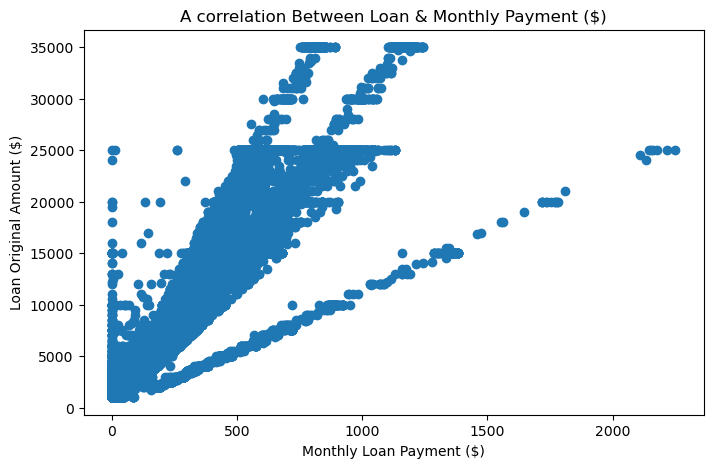

In [11]:
#A scatterplot showing the correlation between LoanOriginalAmount vs. MonthlyLoanPayment
plt.figure(figsize = [8, 5])
plt.scatter(data = loan_subset, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
label('Monthly Loan Payment ($)', 'Loan Original Amount ($)', 'A correlation Between Loan & Monthly Payment ($)');

#### Relationship Between Loan Original Amount, Monthly Loan Payment, & IsBorrowerHomeowner
The distribution indicates an equal number of borrowers that own homes and those without homes accessing the same loan amount of 35k. It is a positive relationship.

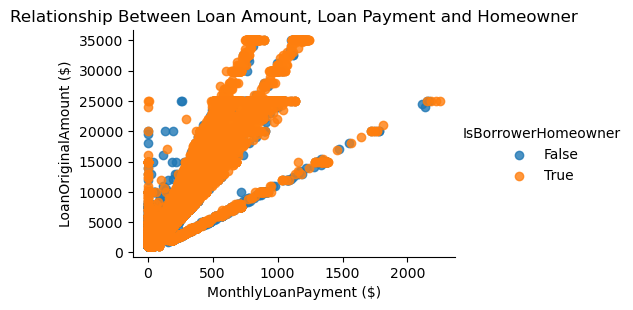

In [12]:
#Investigating into the relationship b/w LoanOriginalAmount, MonthlyLoanPayment & IsBorrowerHomeowner
g = sb.FacetGrid(data = loan_subset, hue = 'IsBorrowerHomeowner', aspect = 1.5) 
g.map(sb.regplot, 'MonthlyLoanPayment', 'LoanOriginalAmount', x_jitter = 0.04, fit_reg = False);
plt.title('Relationship Between Loan Amount, Loan Payment and Homeowner')
g.add_legend();
label('MonthlyLoanPayment ($)', 'LoanOriginalAmount ($)', 'Relationship Between Loan Amount, Loan Payment and Homeowner');

In [13]:
!jupyter nbconvert Part_II_Side_Deck_Template_1_Proj_III.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_Side_Deck_Template_1_Proj_III.ipynb to slides
[NbConvertApp] Writing 828255 bytes to Part_II_Side_Deck_Template_1_Proj_III.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Side_Deck_Template_1_Proj_III.slides.html
Use Control-C to stop this server
^C

Interrupted
